### 决策树可视化

In [1]:
import numpy as np
import pandas as pd
y = np.array(list('NYYYYYNYYN'))
print(y)
X = pd.DataFrame({'日志密度':list('sslmlmmlms'),
                  '好友密度':list('slmmmlsmss'),
                  '真实头像':list('NYYYYNYYYY')})
X

['N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N']


,日志密度,好友密度,真实头像
0,s,s,N
1,s,l,Y
2,l,m,Y
3,m,m,Y
4,l,m,Y
5,m,l,N
6,m,s,Y
7,l,m,Y
8,m,s,Y
9,s,s,Y


In [2]:
X['日志密度'] = X['日志密度'].map({'s':0,'m':1,'l':2})
X['好友密度'] = X['好友密度'].map({'s':0,'m':1,'l':2})
X['真实头像'] = X['真实头像'].map({'N':0,'Y':1})
X

,日志密度,好友密度,真实头像
0,0,0,0
1,0,2,1
2,2,1,1
3,1,1,1
4,2,1,1
5,1,2,0
6,1,0,1
7,2,1,1
8,1,0,1
9,0,0,1


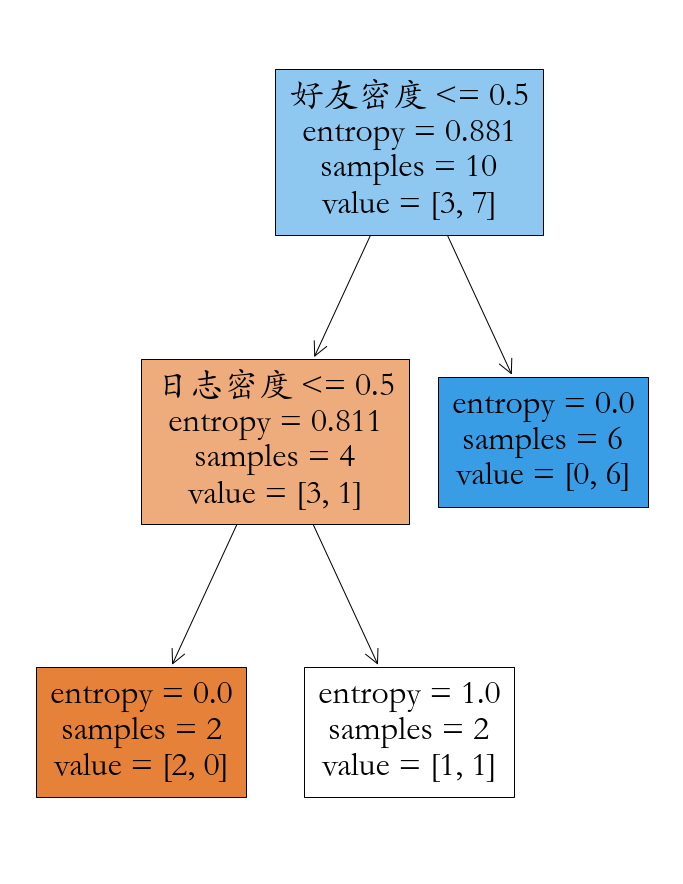

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 使用信息熵，作为分裂标准
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
plt.rcParams['font.family'] = 'STKaiti'
plt.figure(figsize=(12,16))
fn = X.columns
_ = tree.plot_tree(model,filled = True,feature_names=fn)
plt.savefig('./iris.jpg')

### 另一种可视化方式

In [4]:
X.columns

Index(['日志密度', '好友密度', '真实头像'], dtype='object')

In [5]:
np.unique(y)

array(['N', 'Y'], dtype='<U1')

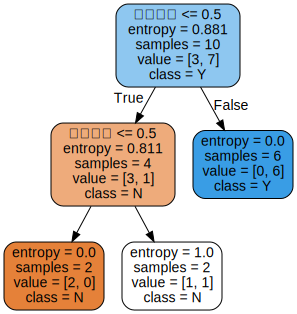

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import graphviz # 第三方库，pip install graghviz
# 这个库，有一些依赖：

from sklearn import tree
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
# 图片数据
dot_data = tree.export_graphviz(model, out_file=None, 
                            feature_names= X.columns,# 特征名
                            class_names=np.unique(y),# 类别名
                            filled=True, # 填充颜色
                            rounded=True) # 圆角

graph = graphviz.Source(dot_data)
# graph.render('Account',format='png')
graph

In [7]:
0.811 * 0.4

0.3244

#### 修改字体显示中文

In [8]:
from matplotlib import font_manager
fm = font_manager.FontManager()
[font.name for font in fm.ttflist]

['cmss10',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'cmtt10',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'cmex10',
 'STIXSizeFiveSym',
 'cmb10',
 'DejaVu Sans Mono',
 'cmsy10',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXGeneral',
 'cmmi10',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'cmr10',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'Jokerman',
 'Vivaldi',
 'Leelawadee UI',
 'Bodoni MT',
 'Corbel',
 'Calibri',
 'Gigi',
 'Eras Medium ITC',
 'Ink Free',
 'Book Antiqua',
 'Kunstler Script',
 'SimSun-ExtB',
 'Franklin Gothic Demi Cond',
 'Corbel',
 'Consolas',
 'Trebuchet MS',
 'Sitka',
 'Segoe Print',
 'Microsoft New Tai Lue',
 'Franklin Gothic Heavy',
 'SimHei',
 'MS Ou

In [9]:
import re
f = open('./Account','r',encoding='utf8')

with open('./Account2','w',encoding='utf8') as fp:
    result = re.sub(r'fontname="helvetica"','fontname="FangSong"',f.read())
    fp.write(result)
f.close()

In [10]:
graph = graphviz.Source.from_file('./Account2')
graph.render('./决策树')

'决策树.pdf'

### 分裂条件的计算【信息熵】

#### 计算一下未分类的信息熵

In [11]:
X['真实用户'] = y # 数据合并
X

,日志密度,好友密度,真实头像,真实用户
0,0,0,0,N
1,0,2,1,Y
2,2,1,1,Y
3,1,1,1,Y
4,2,1,1,Y
5,1,2,0,Y
6,1,0,1,N
7,2,1,1,Y
8,1,0,1,Y
9,0,0,1,N


In [12]:
s = X['真实用户']
p = s.value_counts()/s.size # 这个就是各个类别的比例，百分比

# 信息熵【没有根据条件进行划分的信息熵】
(p * np.log2(1/p)).sum()

0.8812908992306926

#### 按照日志密度进行划分

In [13]:
x = X['日志密度'].unique()
x.sort() # 排序，从小到大
# 如何划分，分成两部分
for i in range(len(x) - 1):
    split = x[i:i+2].mean() # 切片一次切两个，求平均值【裂分点】
    cond = X['日志密度'] <= split # 条件判断，拆分条件 0.5
    p = cond.value_counts()/cond.size # p就是比例
    # 按照条件划分，两边情况
    indexes = p.index
    entropy = 0
    for index in indexes: # True,False
        user = X[cond == index]['真实用户']
        # 分别计算分成的两边的信息熵
        p_user = user.value_counts()/user.size
        # 一边的信息熵，乘以这一边占全部数据的比例
        entropy += (p_user * np.log2(1/p_user)).sum() * p[index]
    print(split,entropy)

0.5 0.689659695223976
1.5 0.689659695223976


#### 按照好友密度进行划分

In [14]:
x = X['好友密度'].unique()
x.sort() # 排序，从小到大
# 如何划分，分成两部分
for i in range(len(x) - 1):
    split = x[i:i+2].mean() # 切片一次切两个，求平均值【裂分点】
    cond = X['好友密度'] <= split # 条件判断，拆分条件 0.5
    p = cond.value_counts()/cond.size # p就是比例
    print(p)
    # 按照条件划分，两边情况
    indexes = p.index
    entropy = 0
    for index in indexes: # True,False
        user = X[cond == index]['真实用户']
        # 分别计算分成的两边的信息熵
        p_user = user.value_counts()/user.size
        # 一边的信息熵，乘以这一边占全部数据的比例
        entropy += (p_user * np.log2(1/p_user)).sum() * p[index]
    print(split,entropy)

False    0.6
True     0.4
Name: 好友密度, dtype: float64
0.5 0.32451124978365314
True     0.8
False    0.2
Name: 好友密度, dtype: float64
1.5 0.763547202339972


#### 信息增益

In [15]:
# 0.5 划分，信息增益
0.881 - 0.3245

0.5565

In [16]:
# 1.5 划分，信息增益
0.881 - 0.7635

0.11750000000000005

### 多个特征进行最佳裂分条件筛选

In [18]:
columns = ['日志密度','好友密度','真实头像']
lower_entropy = 1 # 记录，最低信息熵，是多少
condition = {} # 记录最佳裂分点
for col in columns:
    x = X[col].unique()
    x.sort()
    # 如何划分问题
    for i in range(len(x) -1):
        split = x[i:i+2].mean()
        cond = X[col] <= split
        p = cond.value_counts()/cond.size
        indexes = p.index
        entropy = 0
        for index in indexes:
            user = X[cond == index]['真实用户']
            p_user = user.value_counts()/user.size
            entropy += (p_user * np.log2(1/p_user)).sum() * p[index]
        print(col,split,entropy)
        if entropy < lower_entropy:
            condition.clear()
            lower_entropy = entropy
            condition[col] = split
print('最佳裂分条件是：',condition)

日志密度 0.5 0.689659695223976
日志密度 1.5 0.689659695223976
好友密度 0.5 0.32451124978365314
好友密度 1.5 0.763547202339972
真实头像 0.5 0.8490224995673064
最佳裂分条件是： {'好友密度': 0.5}


### 继续裂分，树枝如何裂分【选择】

In [20]:
columns = ['日志密度','真实头像']
lower_entropy = 1 # 记录，最低信息熵，是多少
condition = {} # 记录最佳裂分点
cond = X['好友密度'] <= 0.5
X = X[cond] # 更新了数据X
for col in columns:
    x = X[col].unique()
    x.sort()
    # 如何划分问题
    for i in range(len(x) -1):
        split = x[i:i+2].mean()
        cond = X[col] <= split
        p = cond.value_counts()/cond.size
        indexes = p.index
        entropy = 0
        for index in indexes:
            user = X[cond == index]['真实用户']
            p_user = user.value_counts()/user.size
            entropy += (p_user * np.log2(1/p_user)).sum() * p[index]
        print(col,split,entropy)
        if entropy < lower_entropy:
            condition.clear()
            lower_entropy = entropy
            condition[col] = split
print('最佳裂分条件是：',condition)

日志密度 0.5 0.5
真实头像 0.5 0.6887218755408671
最佳裂分条件是： {'日志密度': 0.5}


In [21]:
X

,日志密度,好友密度,真实头像,真实用户
0,0,0,0,N
6,1,0,1,N
8,1,0,1,Y
9,0,0,1,N
